# Presentaion on Advanced Data Minining & Machine Learning
Presented to: **Tanvir Ahammad** <br>
Computer Science and Engineering. JnU <br><br>
Presented By:<br> **Kazi Muhammad Afsarul Hoque - M240105078 <br>
Md Arifur Rahman - M240105042** <br>

Weather Data from 1901 to 2023<br>
Data Source: Kaggle<br>
Source Link: https://www.kaggle.com/datasets/yakinrubaiat/bangladesh-weather-dataset<br>

**Brief introduction about data:** Dataset that combines temperature 🌡️ and rainfall 🌧️ data. The temperature data is sourced from NASA's POWER Project, and the rainfall data is obtained from the Humanitarian Data Exchange (HDX) website, specifically focusing on Bangladesh rainfall data.


# Data Preprocessing
 Data Upload

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving temp_and_rain_dataset.xlsx to temp_and_rain_dataset.xlsx


Loading Dataset

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_excel('temp_and_rain_dataset.xlsx')
print(df.head())

# print(df.shape)



   Temperature  Month  Year      Rain
0      16.9760      1  1901   18.5356
1      19.9026      2  1901   16.2548
2      24.3158      3  1901   70.7981
3      28.1834      4  1901   66.1616
4      27.8892      5  1901  267.2150
(1474, 4)


Check Dataset Information - Missing Value

In [ ]:
print(df.info())
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1474 entries, 0 to 1473
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  1474 non-null   float64
 1   Month        1474 non-null   int64  
 2   Year         1474 non-null   int64  
 3   Rain         1474 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 46.2 KB
None
Temperature    0
Month          0
Year           0
Rain           0
dtype: int64


If value is missing

In [ ]:
# Fill missing values (if any)
# df['Temperature'] = df['Temperature'].fillna(df['Temperature'].mean())
# df['Rain'] = df['Rain'].fillna(df['Rain'].mean())


NameError: name 'df' is not defined

Convert Data Types

In [ ]:
# Check data types
print("Data Types:\n", df.dtypes)

# Convert columns to appropriate data types
df['Month'] = df['Month'].astype(int)
df['Year'] = df['Year'].astype(int)
df['Temperature'] = df['Temperature'].astype(float)
df['Rain'] = df['Rain'].astype(float)


Data Types:
 Temperature    float64
Month            int64
Year             int64
Rain           float64
dtype: object


Define Seasons in Bangladesh

In [ ]:
# Define six seasons in Bangladesh based on months
def assign_bangladesh_season(month):
    if month in [4, 5]:
        return 'Summer'
    elif month in [6, 7]:
        return 'Monsoon'
    elif month in [8, 9]:
        return 'Autumn'
    elif month in [10, 11]:
        return 'Late Autumn'
    elif month in [12, 1]:
        return 'Winter'
    elif month in [2, 3]:
        return 'Spring'

# Add Season column to the dataset
df['Season'] = df['Month'].apply(assign_bangladesh_season)


print(df[['Month', 'Season']].drop_duplicates())


    Month       Season
0       1       Winter
1       2       Spring
2       3       Spring
3       4       Summer
4       5       Summer
5       6      Monsoon
6       7      Monsoon
7       8       Autumn
8       9       Autumn
9      10  Late Autumn
10     11  Late Autumn
11     12       Winter


Calculate Yearly and Seasonal Averages

Yearly Averages

In [ ]:
# Calculate yearly averages
yearly_averages = df.groupby('Year').agg({
    'Temperature': 'mean',
    'Rain': 'sum'
}).reset_index()

# Rename columns
yearly_averages.rename(columns={
    'Temperature': 'Avg_Temperature',
    'Rain': 'Total_Rain'
}, inplace=True)

# Merge yearly averages back to the dataset
df = pd.merge(df, yearly_averages, on='Year', how='left')

print(yearly_averages)


     Year  Avg_Temperature   Total_Rain
0    1901        24.819617  2432.819450
1    1902        24.672608  2345.714360
2    1903        24.823542  2257.387300
3    1904        24.628058  2450.069280
4    1905        24.205500  2806.313220
..    ...              ...          ...
118  2019        24.990994  2405.585882
119  2020        24.755417  2494.172060
120  2021        24.956380  2263.906380
121  2022        24.925597  1987.632308
122  2023        26.166291  1973.152708

[123 rows x 3 columns]


Seasonal Averages

In [ ]:
# Calculate seasonal averages
seasonal_averages = df.groupby('Season').agg({
    'Temperature': 'mean',
    'Rain': 'mean'
}).reset_index()


seasonal_averages.rename(columns={
    'Temperature': 'Season_Avg_Temperature',
    'Rain': 'Season_Avg_Rain'
}, inplace=True)


print(seasonal_averages)


        Season  Season_Avg_Temperature  Season_Avg_Rain
0       Autumn               28.043963       373.131110
1  Late Autumn               24.894526       104.847624
2      Monsoon               28.087515       489.795975
3       Spring               22.762071        31.535707
4       Summer               27.829543       209.149470
5       Winter               18.754681         7.249596


Code for EDA <br>
Temperature Trends <br>
Plot Yearly Average Temperatures


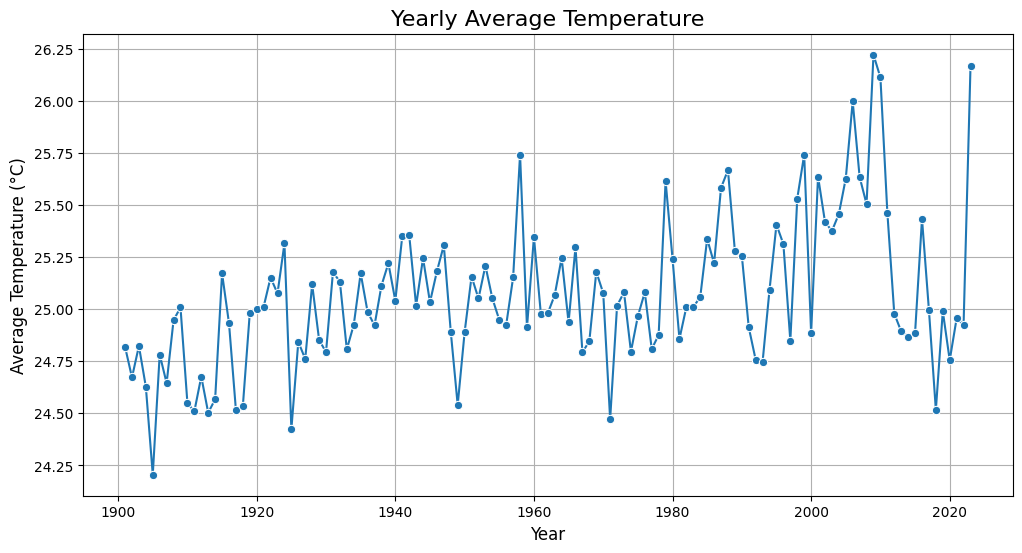

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot yearly average temperature
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_averages, x='Year', y='Avg_Temperature', marker='o')
plt.title('Yearly Average Temperature', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Temperature (°C)', fontsize=12)
plt.grid()
plt.show()


Boxplot for Monthly Temperature Variation

<ipython-input-29-0e8d1a7ae5ec>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Month', y='Temperature', palette='coolwarm')


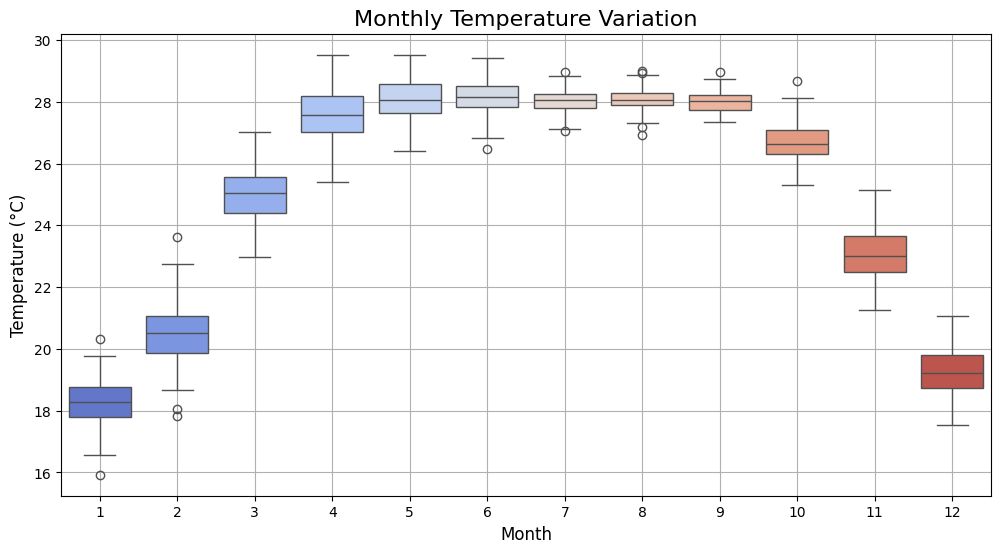

In [ ]:
# Boxplot for monthly temperature variation
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Month', y='Temperature', palette='coolwarm')
plt.title('Monthly Temperature Variation', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Temperature (°C)', fontsize=12)
plt.grid()
plt.show()


Rainfall Trends <br>Plot Yearly Total Rainfall

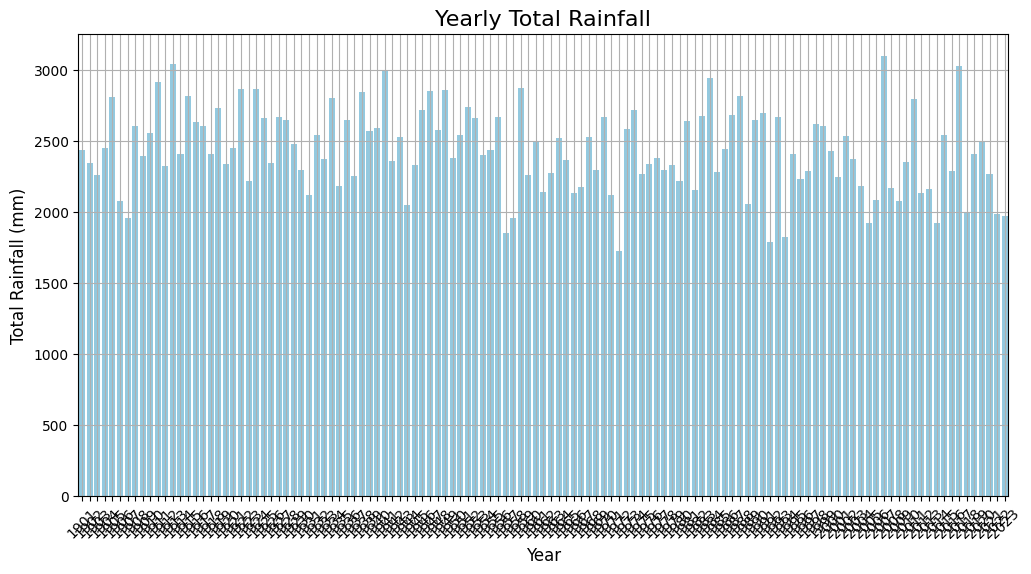

In [ ]:
# Plot yearly total rainfall
plt.figure(figsize=(12, 6))
sns.barplot(data=yearly_averages, x='Year', y='Total_Rain', color='skyblue')
plt.title('Yearly Total Rainfall', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Rainfall (mm)', fontsize=12)
plt.xticks(rotation=45)
plt.grid()
plt.show()


Boxplot for Monthly Rainfall

<ipython-input-12-3de468530b2d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Month', y='Rain', palette='Blues')


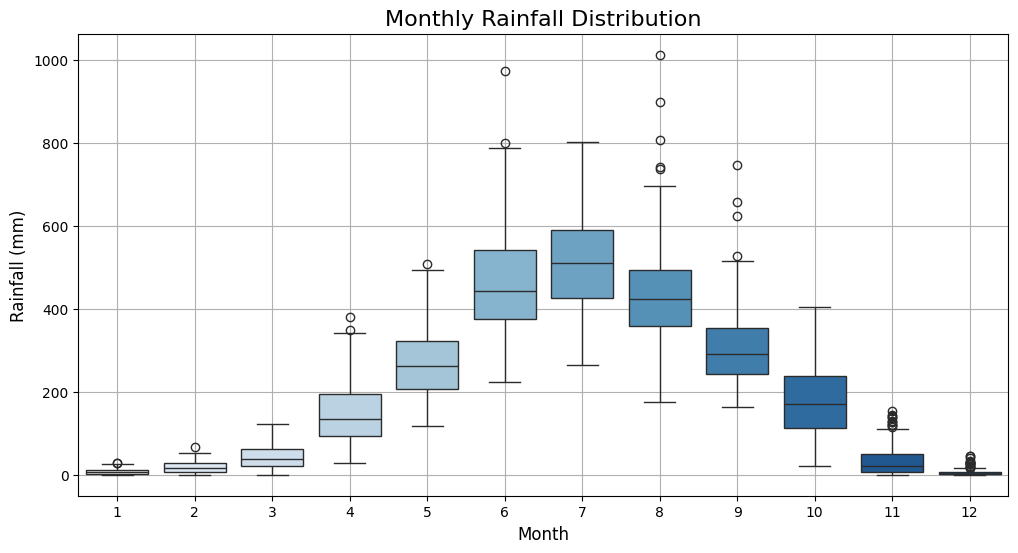

In [ ]:
# Boxplot for monthly rainfall
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Month', y='Rain', palette='Blues')
plt.title('Monthly Rainfall Distribution', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Rainfall (mm)', fontsize=12)
plt.grid()
plt.show()


Seasonal Patterns <br>
Compare Average Rainfall and Temperature Across Seasons

<ipython-input-13-04d8bcfe1db9>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=seasonal_averages, x='Season', y='Season_Avg_Temperature', palette='coolwarm')
<ipython-input-13-04d8bcfe1db9>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=seasonal_averages, x='Season', y='Season_Avg_Rain', palette='Blues')


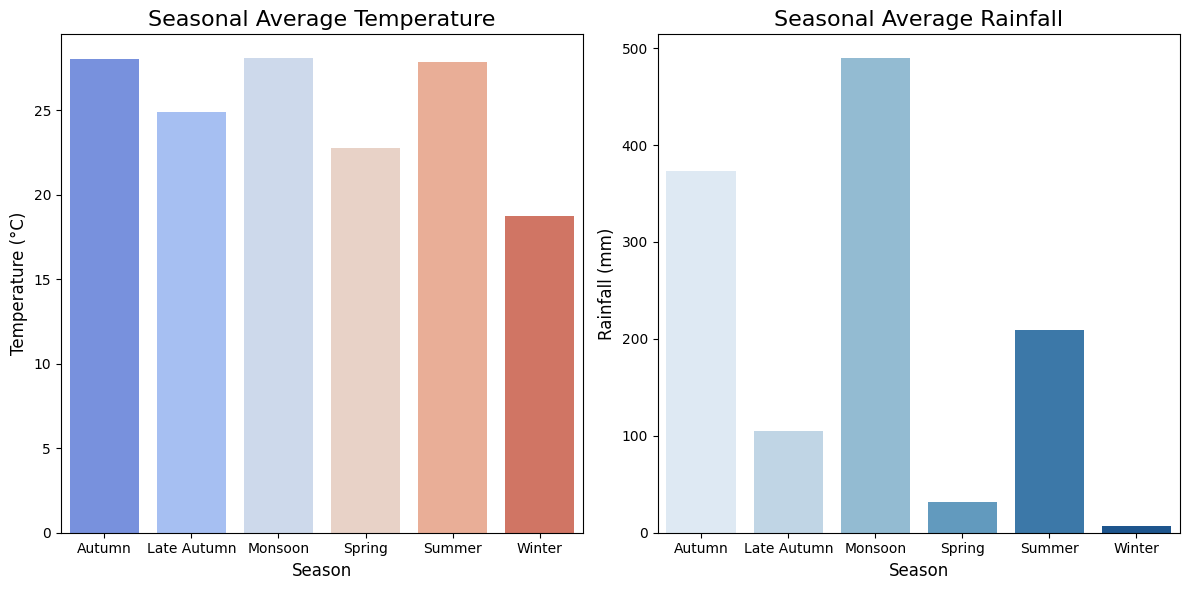

In [ ]:
# Plot seasonal average temperature and rainfall
plt.figure(figsize=(12, 6))

# Subplot 1: Seasonal average temperature
plt.subplot(1, 2, 1)
sns.barplot(data=seasonal_averages, x='Season', y='Season_Avg_Temperature', palette='coolwarm')
plt.title('Seasonal Average Temperature', fontsize=16)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Temperature (°C)', fontsize=12)

# Subplot 2: Seasonal average rainfall
plt.subplot(1, 2, 2)
sns.barplot(data=seasonal_averages, x='Season', y='Season_Avg_Rain', palette='Blues')
plt.title('Seasonal Average Rainfall', fontsize=16)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Rainfall (mm)', fontsize=12)

plt.tight_layout()
plt.show()


Predict Rainfall
Feature Selection and Data Preparation

In [ ]:
# Adding the Month column back from the original dataset
# Merge the monthly data with the yearly averages to add Month
yearly_averages_with_month = pd.merge(yearly_averages, df[['Year', 'Month']], on='Year', how='left')

# Check the columns again
print(yearly_averages_with_month.columns)

# Now you can proceed with the X_rainfall and y_rainfall as expected
X_rainfall = yearly_averages_with_month[['Avg_Temperature', 'Month', 'Year']]
y_rainfall = yearly_averages_with_month['Total_Rain']


Index(['Year', 'Avg_Temperature', 'Total_Rain', 'Cluster', 'DBSCAN_Cluster',
       'Month'],
      dtype='object')


Clustering code will be written later